In [1]:
import os
import keras
import cv2
import h5py
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
from glob import glob
from keras.models import Model
from keras.layers import Input, Dense, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
model = tf.keras.models.Sequential([

tf.keras.layers.Conv2D(16, (3,3), activation='relu',padding = 'same', input_shape=(224, 224, 3)),
#tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(1024, activation='tanh'),
tf.keras.layers.Dropout(0.01),
tf.keras.layers.Dense(512, activation='tanh',kernel_regularizer=regularizers.l2(0.01)),
tf.keras.layers.Dropout(0.01),
#tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(32, activation='tanh'),

tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
          optimizer=Adam(lr=0.001),
          metrics=['accuracy'])



In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 222, 222, 32)      4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True)
vali_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '../input/urecamain/Train',
        target_size=(224, 224),
        batch_size=64,
        classes = ['Fire','Non-Fire'],
        shuffle = True,
        
        class_mode='binary')
validation_generator = vali_datagen.flow_from_directory(
        '../input/urecamain/Vali',
        target_size=(224, 224),
        batch_size=64,
        classes = ['Fire','Non-Fire'],
        shuffle = True,
        class_mode='binary')
test_generator = test_datagen.flow_from_directory(
        '../input/urecamain/Test',
        target_size=(224, 224),
        batch_size=64,
        classes = ['Fire','Non-Fire'],
        shuffle = True,
        class_mode='binary')


Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
file_path = "./Final1.h5"
checkpoint = ModelCheckpoint(file_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
reduce_on_plateau = ReduceLROnPlateau(monitor="loss", mode="min", factor=0.1, patience=5, verbose=1)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=8)
callbacks_list = [ checkpoint, reduce_on_plateau, es]

curr_model_hist = model.fit(
      train_generator,
      callbacks=callbacks_list,
      epochs=100,
      validation_data=validation_generator,
      verbose=1)

Train for 94 steps, validate for 32 steps
Epoch 1/100
93/94 [============================>.] - ETA: 0s - loss: 2.9825 - accuracy: 0.6624
Epoch 00001: val_accuracy improved from -inf to 0.66950, saving model to ./Final1.h5
94/94 [==============================] - 50s 528ms/step - loss: 2.9594 - accuracy: 0.6623 - val_loss: 0.8172 - val_accuracy: 0.6695
Epoch 2/100
93/94 [============================>.] - ETA: 0s - loss: 0.5206 - accuracy: 0.8072
Epoch 00002: val_accuracy improved from 0.66950 to 0.82550, saving model to ./Final1.h5
94/94 [==============================] - 32s 342ms/step - loss: 0.5206 - accuracy: 0.8071 - val_loss: 0.4172 - val_accuracy: 0.8255
Epoch 3/100
93/94 [============================>.] - ETA: 0s - loss: 0.4204 - accuracy: 0.8392
Epoch 00003: val_accuracy did not improve from 0.82550
94/94 [==============================] - 32s 341ms/step - loss: 0.4189 - accuracy: 0.8399 - val_loss: 0.4059 - val_accuracy: 0.8220
Epoch 4/100
93/94 [============================>.

Epoch 29/100
93/94 [============================>.] - ETA: 0s - loss: 0.0670 - accuracy: 0.9862
Epoch 00029: val_accuracy improved from 0.94000 to 0.94050, saving model to ./Final1.h5
94/94 [==============================] - 32s 337ms/step - loss: 0.0665 - accuracy: 0.9863 - val_loss: 0.2785 - val_accuracy: 0.9405
Epoch 30/100
93/94 [============================>.] - ETA: 0s - loss: 0.0573 - accuracy: 0.9884
Epoch 00030: val_accuracy did not improve from 0.94050
94/94 [==============================] - 31s 334ms/step - loss: 0.0569 - accuracy: 0.9885 - val_loss: 0.3361 - val_accuracy: 0.9215
Epoch 31/100
93/94 [============================>.] - ETA: 0s - loss: 0.0610 - accuracy: 0.9850
Epoch 00031: val_accuracy did not improve from 0.94050
94/94 [==============================] - 31s 329ms/step - loss: 0.0612 - accuracy: 0.9850 - val_loss: 0.3099 - val_accuracy: 0.9350
Epoch 32/100
93/94 [============================>.] - ETA: 0s - loss: 0.0689 - accuracy: 0.9867
Epoch 00032: val_accur

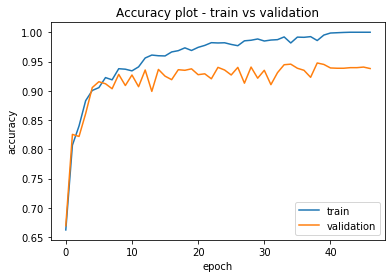

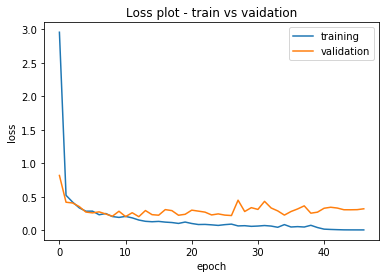

In [10]:
import matplotlib.pyplot as plt
def plot_accuracy(y):
    if(y == True):
        plt.plot(curr_model_hist.history['accuracy'])
        plt.plot(curr_model_hist.history['val_accuracy'])
        plt.legend(['train', 'validation'], loc='lower right')
        plt.title('Accuracy plot - train vs validation')
        plt.xlabel('epoch')
        plt.ylabel('accuracy')
        plt.show()
    else:
        pass
    return

def plot_loss(y):
    if(y == True):
        plt.plot(curr_model_hist.history['loss'])
        plt.plot(curr_model_hist.history['val_loss'])
        plt.legend(['training', 'validation'], loc = 'upper right')
        plt.title('Loss plot - train vs vaidation')
        plt.xlabel('epoch')
        plt.ylabel('loss')
        plt.show()
    else:
        pass
    return


plot_accuracy(True)
plot_loss(True)

In [11]:
lossandacc = model.evaluate_generator(test_generator,verbose=1)
print(lossandacc)

32/32 [==============================] - 7s 234ms/step - loss: 0.3991 - accuracy: 0.9220
[0.39906989206792787, 0.922]


# Initializing Model Architectures 
## Included imagenet weights 

# Training using MobileNetV2

In [12]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def get_model():
    base = MobileNetV2(input_shape=(224,224,3), include_top=False, \
                       pooling='max', weights='imagenet')
    base.trainable = False
    dense = Dense(1, activation='sigmoid', name='dense')(base.output)

    model = Model(inputs=base.inputs, outputs=dense, name='mobilenetv2')
    model.compile(loss='binary_crossentropy',
          optimizer=Adam(lr=0.001),
          metrics=['acc'])
    return model

mobilenet = get_model()

file_path = '/mobilenet.h5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
reduce_on_plateau = ReduceLROnPlateau(monitor="loss", mode="min", factor=0.1, patience=5, verbose=1)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=8)
callbacks_list = [ checkpoint, reduce_on_plateau, es]
hist = mobilenet.fit(train_generator,
      callbacks=callbacks_list,
      epochs=100,
      validation_data=validation_generator,
      verbose=1)

9412608/9406464 [==============================] - 1s 0us/step
Train for 94 steps, validate for 32 steps
Epoch 1/100
93/94 [============================>.] - ETA: 0s - loss: 0.6284 - acc: 0.7585
Epoch 00001: val_acc improved from -inf to 0.80750, saving model to /mobilenet.h5
94/94 [==============================] - 35s 370ms/step - loss: 0.6248 - acc: 0.7598 - val_loss: 0.4816 - val_acc: 0.8075
Epoch 2/100
93/94 [============================>.] - ETA: 0s - loss: 0.2611 - acc: 0.8968
Epoch 00002: val_acc improved from 0.80750 to 0.85000, saving model to /mobilenet.h5
94/94 [==============================] - 31s 326ms/step - loss: 0.2598 - acc: 0.8972 - val_loss: 0.3804 - val_acc: 0.8500
Epoch 3/100
93/94 [============================>.] - ETA: 0s - loss: 0.2149 - acc: 0.9168
Epoch 00003: val_acc did not improve from 0.85000
94/94 [==============================] - 30s 321ms/step - loss: 0.2167 - acc: 0.9167 - val_loss: 0.5484 - val_acc: 0.8180
Epoch 4/100
93/94 [=======================

In [13]:
lossandacc = mobilenet.evaluate_generator(test_generator,verbose=1)
print(lossandacc)

32/32 [==============================] - 7s 228ms/step - loss: 0.4004 - acc: 0.8730
[0.4003580794669688, 0.873]


# Training using InceptionResNetV2

In [14]:

from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def get_model():
    base = InceptionResNetV2(input_shape=(224,224,3), include_top=False, \
                       pooling='max', weights='imagenet')
    base.trainable = False
    dense = Dense(1, activation='sigmoid', name='dense')(base.output)

    model = Model(inputs=base.inputs, outputs=dense, name='InceptionResNetV2')
    model.compile(loss='binary_crossentropy',
          optimizer=Adam(lr=0.001),
          metrics=['acc'])
    return model

InceptionResNetV2 = get_model()

file_path = '/InceptionResNetV2.h5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
reduce_on_plateau = ReduceLROnPlateau(monitor="loss", mode="min", factor=0.1, patience=5, verbose=1)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=8)
callbacks_list = [ checkpoint, reduce_on_plateau, es]
hist = InceptionResNetV2.fit(train_generator,
      callbacks=callbacks_list,
      epochs=100,
      validation_data=validation_generator,
      verbose=1)


219062272/219055592 [==============================] - 5s 0us/step
Train for 94 steps, validate for 32 steps
Epoch 1/100
93/94 [============================>.] - ETA: 0s - loss: 0.5117 - acc: 0.7457
Epoch 00001: val_acc improved from -inf to 0.75750, saving model to /InceptionResNetV2.h5
94/94 [==============================] - 50s 537ms/step - loss: 0.5096 - acc: 0.7470 - val_loss: 0.7580 - val_acc: 0.7575
Epoch 2/100
93/94 [============================>.] - ETA: 0s - loss: 0.2678 - acc: 0.8899
Epoch 00002: val_acc did not improve from 0.75750
94/94 [==============================] - 36s 385ms/step - loss: 0.2676 - acc: 0.8901 - val_loss: 1.0533 - val_acc: 0.7320
Epoch 3/100
93/94 [============================>.] - ETA: 0s - loss: 0.2255 - acc: 0.9094
Epoch 00003: val_acc improved from 0.75750 to 0.81650, saving model to /InceptionResNetV2.h5
94/94 [==============================] - 38s 400ms/step - loss: 0.2253 - acc: 0.9094 - val_loss: 0.5960 - val_acc: 0.8165
Epoch 4/100
93/94 [===

In [15]:
lossandacc = InceptionResNetV2.evaluate_generator(test_generator,verbose=1)
print(lossandacc)

32/32 [==============================] - 9s 279ms/step - loss: 1.2067 - acc: 0.7725
[1.20674435980618, 0.7725]


# Training using ResNet152

In [16]:
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def get_model():
    base = ResNet152(input_shape=(224,224,3), include_top=False, \
                       pooling='max', weights='imagenet')
    base.trainable = False
    dense = Dense(1, activation='sigmoid', name='dense')(base.output)

    model = Model(inputs=base.inputs, outputs=dense, name='ResNet152')
    model.compile(loss='binary_crossentropy',
          optimizer=Adam(lr=0.001),
          metrics=['acc'])
    return model

ResNet152 = get_model()

file_path = '/ResNet152.h5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
reduce_on_plateau = ReduceLROnPlateau(monitor="loss", mode="min", factor=0.1, patience=5, verbose=1)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=8)
callbacks_list = [ checkpoint, reduce_on_plateau, es]
hist = ResNet152.fit(train_generator,
      callbacks=callbacks_list,
      epochs=100,
      validation_data=validation_generator,
      verbose=1)

234700800/234698864 [==============================] - 6s 0us/step
Train for 94 steps, validate for 32 steps
Epoch 1/100
93/94 [============================>.] - ETA: 0s - loss: 0.8013 - acc: 0.8173
Epoch 00001: val_acc improved from -inf to 0.54450, saving model to /ResNet152.h5
94/94 [==============================] - 49s 520ms/step - loss: 0.7969 - acc: 0.8186 - val_loss: 0.6922 - val_acc: 0.5445
Epoch 2/100
93/94 [============================>.] - ETA: 0s - loss: 0.2552 - acc: 0.9296
Epoch 00002: val_acc did not improve from 0.54450
94/94 [==============================] - 37s 394ms/step - loss: 0.2556 - acc: 0.9297 - val_loss: 0.7174 - val_acc: 0.4925
Epoch 3/100
93/94 [============================>.] - ETA: 0s - loss: 0.1938 - acc: 0.9444
Epoch 00003: val_acc did not improve from 0.54450
94/94 [==============================] - 37s 393ms/step - loss: 0.1948 - acc: 0.9440 - val_loss: 0.9380 - val_acc: 0.5000
Epoch 4/100
93/94 [============================>.] - ETA: 0s - loss: 0.17

In [17]:
lossandacc = ResNet152.evaluate_generator(test_generator,verbose=1)
print(lossandacc)

32/32 [==============================] - 9s 275ms/step - loss: 1.8844 - acc: 0.5000
[1.8844365999102592, 0.5]


# Training using VGG19

In [18]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def get_model():
    base = VGG19(input_shape=(224,224,3), include_top=False, \
                       pooling='max', weights='imagenet')
    base.trainable = False
    dense = Dense(1, activation='sigmoid', name='dense')(base.output)

    model = Model(inputs=base.inputs, outputs=dense, name='VGG19')
    model.compile(loss='binary_crossentropy',
          optimizer=Adam(lr=0.001),
          metrics=['acc'])
    return model

VGG19 = get_model()

file_path = '/VGG19.h5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
reduce_on_plateau = ReduceLROnPlateau(monitor="loss", mode="min", factor=0.1, patience=5, verbose=1)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=8)
callbacks_list = [ checkpoint, reduce_on_plateau, es]
hist = VGG19.fit(train_generator,
      callbacks=callbacks_list,
      epochs=100,
      validation_data=validation_generator,
      verbose=1)

80142336/80134624 [==============================] - 2s 0us/step
Train for 94 steps, validate for 32 steps
Epoch 1/100
93/94 [============================>.] - ETA: 0s - loss: 0.6530 - acc: 0.5910
Epoch 00001: val_acc improved from -inf to 0.67500, saving model to /VGG19.h5
94/94 [==============================] - 35s 376ms/step - loss: 0.6515 - acc: 0.5927 - val_loss: 0.6037 - val_acc: 0.6750
Epoch 2/100
93/94 [============================>.] - ETA: 0s - loss: 0.4750 - acc: 0.8069
Epoch 00002: val_acc improved from 0.67500 to 0.81100, saving model to /VGG19.h5
94/94 [==============================] - 34s 363ms/step - loss: 0.4750 - acc: 0.8066 - val_loss: 0.4788 - val_acc: 0.8110
Epoch 3/100
93/94 [============================>.] - ETA: 0s - loss: 0.4045 - acc: 0.8474
Epoch 00003: val_acc improved from 0.81100 to 0.81950, saving model to /VGG19.h5
94/94 [==============================] - 34s 361ms/step - loss: 0.4042 - acc: 0.8472 - val_loss: 0.4362 - val_acc: 0.8195
Epoch 4/100
93/94

Epoch 30/100
93/94 [============================>.] - ETA: 0s - loss: 0.2051 - acc: 0.9217
Epoch 00030: val_acc did not improve from 0.89700
94/94 [==============================] - 33s 350ms/step - loss: 0.2066 - acc: 0.9210 - val_loss: 0.3092 - val_acc: 0.8695
Epoch 00030: early stopping


In [19]:
lossandacc = VGG19.evaluate_generator(test_generator,verbose=1)
print(lossandacc)

32/32 [==============================] - 8s 261ms/step - loss: 0.3346 - acc: 0.8505
[0.3346271039918065, 0.8505]


# Training using EfficientNetB7

In [20]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

def get_model():
    base = ResNet50(input_shape=(224,224,3), include_top=False, \
                       pooling='max', weights='imagenet')
    base.trainable = False
    dense = Dense(1, activation='sigmoid', name='dense')(base.output)

    model = Model(inputs=base.inputs, outputs=dense, name='ResNet50')
    model.compile(loss='binary_crossentropy',
          optimizer=Adam(lr=0.001),
          metrics=['acc'])
    return model

ResNet50 = get_model()

file_path = '/EfficientNetB7.h5'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
reduce_on_plateau = ReduceLROnPlateau(monitor="loss", mode="min", factor=0.1, patience=5, verbose=1)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=8)
callbacks_list = [ checkpoint, reduce_on_plateau, es]
hist = ResNet50.fit(train_generator,
      callbacks=callbacks_list,
      epochs=100,
      validation_data=validation_generator,
      verbose=1)

ImportError: cannot import name 'EfficientNetB7' from 'tensorflow.keras.applications' (/opt/conda/lib/python3.7/site-packages/tensorflow_core/python/keras/api/_v2/keras/applications/__init__.py)

In [ ]:
lossandacc = ResNet50.evaluate_generator(test_generator,verbose=1)
print(lossandacc)

In [ ]:
from IPython.display import FileLink
FileLink('./Final1.h5')